<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/AddingExtraFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Feature Transform

In [2]:
# demonstrate the types of features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2, 3], [2, 3], [2,3]])
print(data)
# perfomr a polynomial features transform of the dataset
trans =PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [2 3]
 [2 3]]
[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


# Sonar Dataset

(208, 61)
               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


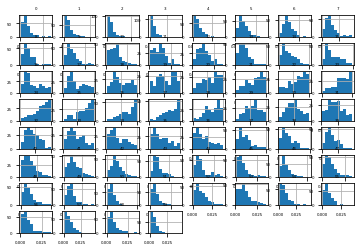

In [4]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv',header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Evaluate the model from KNN

In [6]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.797 (0.073)


Polynomial Feature Transform

In [7]:
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
# retrieve just the numeric input values
data= dataset.values[:,:-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
#summrize
print(dataset.shape)

(208, 39711)


# evaluate with new features

In [5]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv', header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,:-1], data[:,-1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t',trans),('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy',cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)
